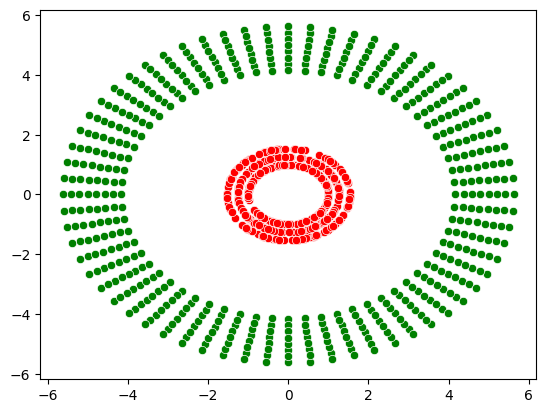

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(69)

def calculate_cluster_means(x, clusters):
    cluster_means = np.zeros((2, x.shape[1]))
    cluster_means[0, :] = np.mean(x[clusters == 0], axis=0)
    cluster_means[1, :] = np.mean(x[clusters == 1], axis=0)
    return cluster_means

def calculate_distances(x, u):
    distances = np.zeros((x.shape[0], u.shape[0]))
    for i in range(u.shape[0]):
        difference = x - u[i, :].reshape((1, -1))
        distances[:, i] = np.sum(np.square(difference), axis=1)
    return distances

def assign_clusters(x, u):
    distances = calculate_distances(x, u)
    clusters = np.argmin(distances, axis=1)
    return clusters.reshape(-1, 1)


data = np.loadtxt('./data/kmeans_data.txt')
feature_squared_sum = (np.sum(np.square(data), axis=1)).reshape(-1, 1)
cluster_centers = feature_squared_sum[:2, :]
cluster_assignment = assign_clusters(feature_squared_sum, cluster_centers)

for iteration in range(10):
    cluster_centers = calculate_cluster_means(feature_squared_sum, cluster_assignment)
    cluster_assignment = assign_clusters(feature_squared_sum, cluster_centers)
    positive_points = (cluster_assignment == 1).reshape(cluster_assignment.shape[0])
    negative_points = (cluster_assignment == 0).reshape(cluster_assignment.shape[0])

sns.scatterplot(x=data[positive_points, 0], y=data[positive_points, 1], color='green')
sns.scatterplot(x=data[negative_points, 0], y=data[negative_points, 1], color='red')

# plt.savefig('part2_handcrafted.png')
plt.show()


